<a href="https://colab.research.google.com/github/Patrikovik/Desafio_Covid19_Modulo_01/blob/main/Covid_19_Number_of_Cases_and_deaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Início

Projeto de conclusão do primeiro módulo do boot camp de data science aplicado promovido pela Alura!

## Introdução

Neste projeto foi investigado uma base de dados disponibilizada pelo portal Brasil IO das contagens de casos e mortes do Sars-Cov-19, popularmente conhecido como covid 19. Também foi utilizado uma base de dados do Kaggle com registro de mortes mensais desde 1970 até 2020.

>> Inicialmente foi realizado um processo de entendimento das bases para descobrir inconsistências nos dados em ambas as bases.


>> Em seguida os dados foram estudados para análise e levantamento de hipóteses.

Autor: Guilherme Rodrigues Barbazza



**Instalação,Importação das bibliotecas e dos dados.**

In [ ]:
!pip install missingno

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# sns.set()

In [ ]:
#https://brasil.io/dataset/covid19/caso_full/
pd.options.display.float_format='{:.2f}'.format
covid19 = pd.read_csv('caso_full.csv.gz', compression = 'gzip')
covid19.shape
covid19

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.00,2020-02-25,9,12325232.00,12252023.00,False,False,1,0.01,2020-02-25,0.00,0,1,city,SP,1,0
1,NaN,35.00,2020-02-25,9,46289333.00,45919049.00,False,False,1,0.00,2020-02-25,0.00,0,1,state,SP,1,0
2,São Paulo,3550308.00,2020-02-26,9,12325232.00,12252023.00,False,False,1,0.01,2020-02-26,0.00,0,2,city,SP,0,0
3,NaN,35.00,2020-02-26,9,46289333.00,45919049.00,False,False,1,0.00,2020-02-26,0.00,0,2,state,SP,0,0
4,São Paulo,3550308.00,2020-02-27,9,12325232.00,12252023.00,False,False,1,0.01,2020-02-27,0.00,0,3,city,SP,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027372,NaN,43.00,2020-11-09,46,11422973.00,11377239.00,True,False,261656,2290.61,2020-11-09,0.02,5997,245,state,RS,758,5
1027373,NaN,42.00,2020-11-09,46,7252502.00,7164788.00,True,False,275655,3800.83,2020-11-09,0.01,3231,243,state,SC,1034,20
1027374,NaN,28.00,2020-11-09,46,2318822.00,2298696.00,True,False,85477,3686.23,2020-11-09,0.03,2244,241,state,SE,100,1
1027375,NaN,35.00,2020-11-09,46,46289333.00,45919049.00,False,True,1125936,2432.39,2020-11-05,0.04,39717,259,state,SP,0,0


#Processo de exploração para identificação de inconsistênicas nas bases de *dados***



Como se trata de uma base de dados relativamente extensa e que coleta dados de diversas fontes muitas vezes fora de uma padrão, é importante verificar a qualidade dos dados para futuras análises e para ter o mínimo de garantia de integração com outras bases de dados.

Para isto, inicialmente, será utilizado a lib missingno para verificar os *missings* na base de dados. <Tutorial utilizado https://www.youtube.com/watch?v=oDEDdkNKvio>





<Figure size 720x720 with 0 Axes>

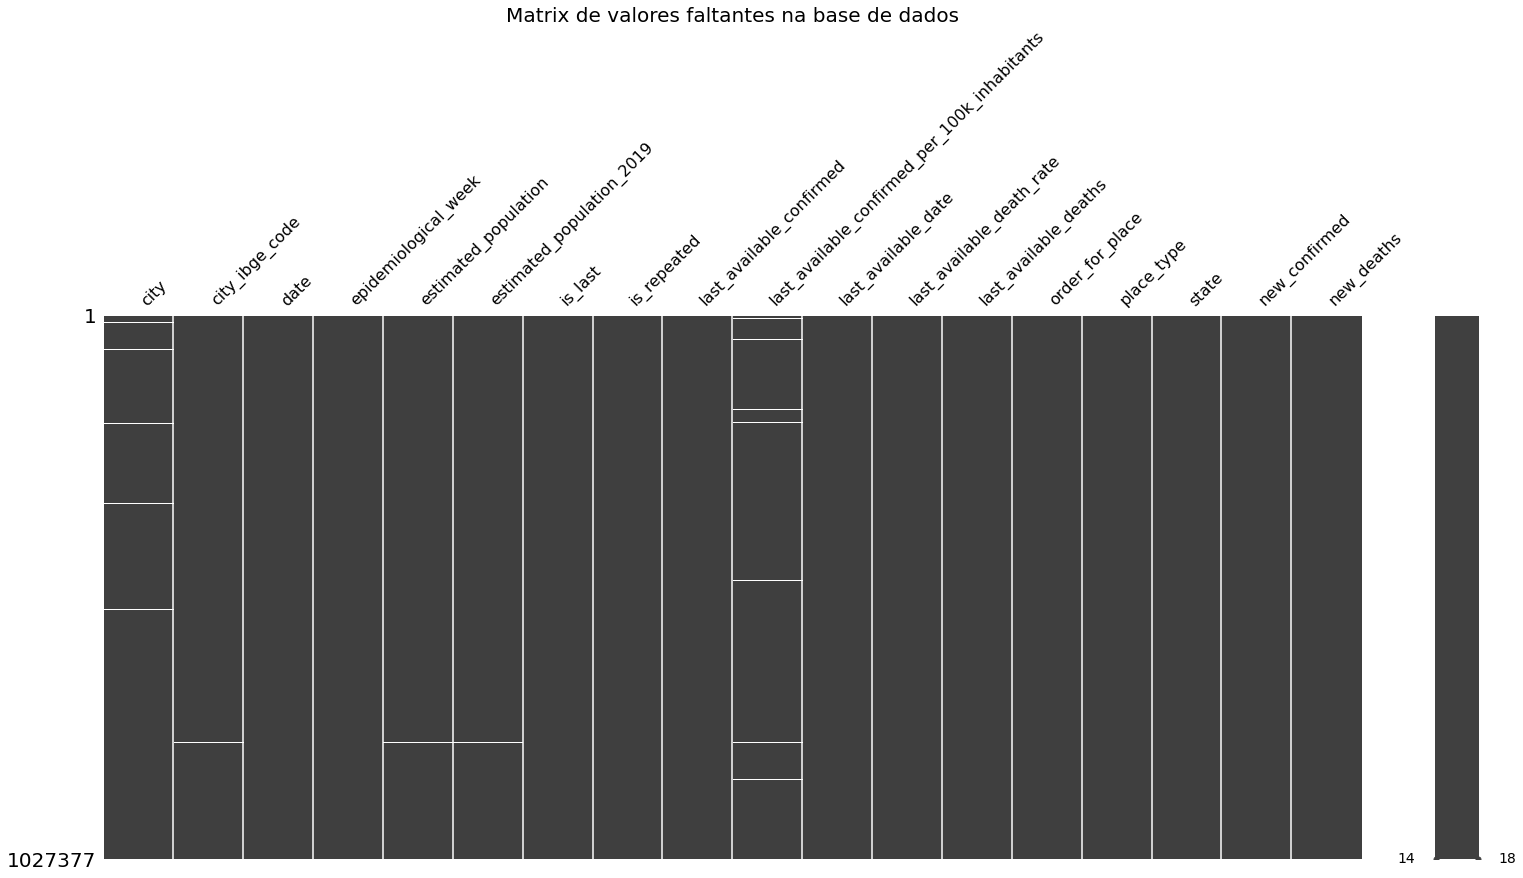

In [ ]:
plt.figure(figsize=(10,10))
msno.matrix(covid19)
plt.title('Matrix de valores faltantes na base de dados',fontsize=20)
plt.show()

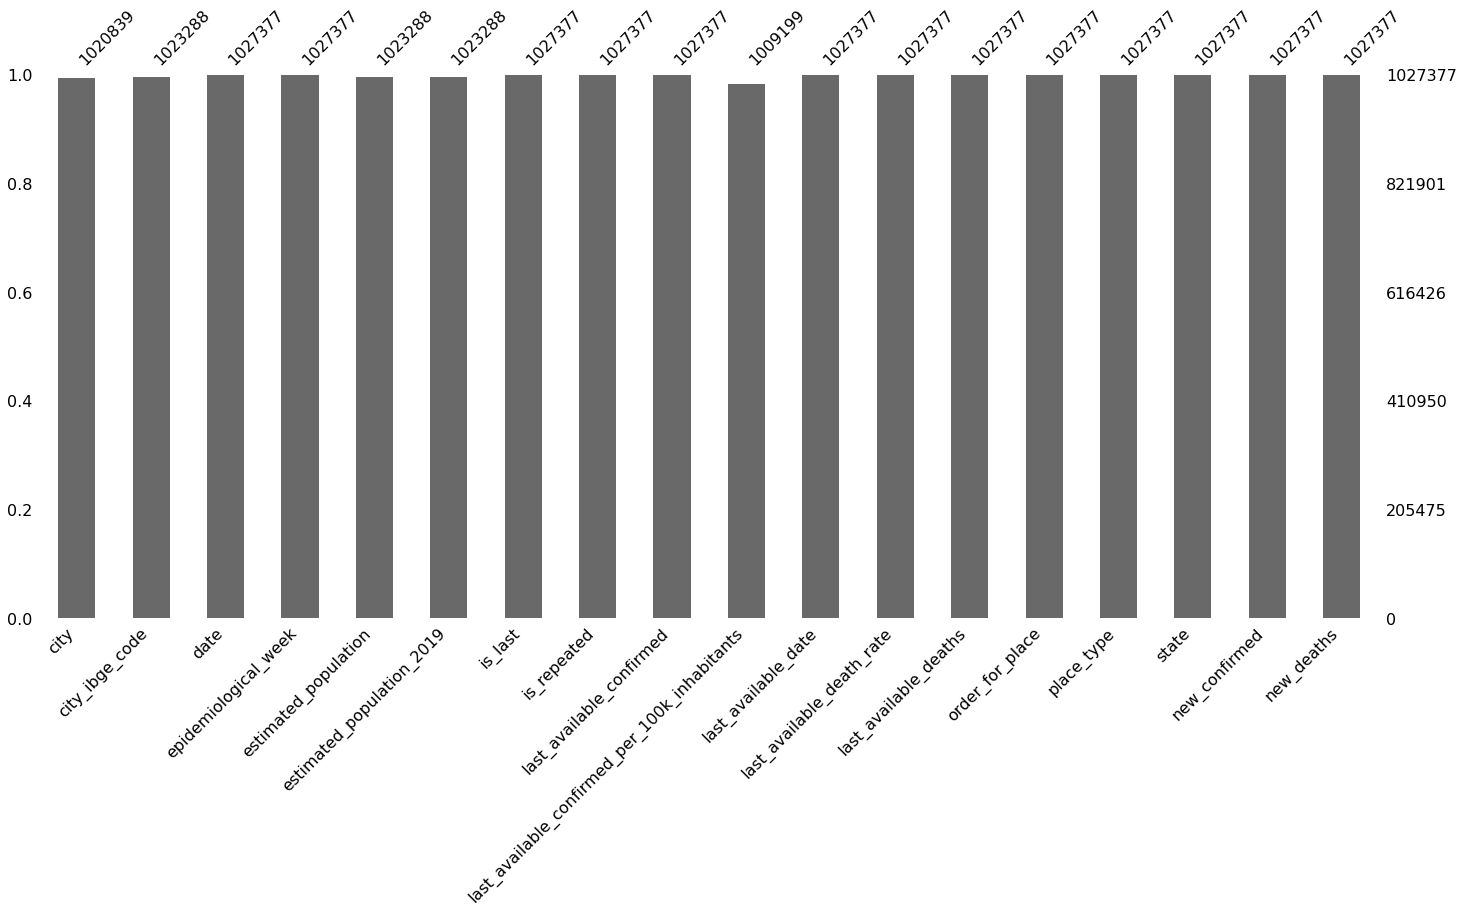

In [ ]:
msno.bar(covid19)


In [ ]:
#Verificação da quantidade de linhas faltantes no dataframe:
covid19.isnull().sum()

city                                              6538
city_ibge_code                                    4089
date                                                 0
epidemiological_week                                 0
estimated_population                              4089
estimated_population_2019                         4089
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    18178
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

In [ ]:
#Verificação dos valores faltantes na base de dados.
#pd.options.display.float_format='{:.0f}'.format
pd.options.display.float_format='{:.2f} %'.format
covid19.isnull().sum()/covid19.shape[0]*100


city                                            0.64 %
city_ibge_code                                  0.40 %
date                                            0.00 %
epidemiological_week                            0.00 %
estimated_population                            0.40 %
estimated_population_2019                       0.40 %
is_last                                         0.00 %
is_repeated                                     0.00 %
last_available_confirmed                        0.00 %
last_available_confirmed_per_100k_inhabitants   1.77 %
last_available_date                             0.00 %
last_available_death_rate                       0.00 %
last_available_deaths                           0.00 %
order_for_place                                 0.00 %
place_type                                      0.00 %
state                                           0.00 %
new_confirmed                                   0.00 %
new_deaths                                      0.00 %
dtype: flo

*city_ibge_code*, *Estimated_Population*,*Estimated_population_2019* têm a mesma quantidade de missing values!

> Desta forma, uma analise interessante de ser feita, justamente para validar se as linhas que contêm *missings* na coluna *city* necessáriamente têm *missing* nas colunas supracitadas:





In [ ]:
verifyMissingRows = covid19.query('city_ibge_code != city_ibge_code')
# verifyMissingRows
verifyMissingRows.isnull().sum()

city                                                0
city_ibge_code                                   4089
date                                                0
epidemiological_week                                0
estimated_population                             4089
estimated_population_2019                        4089
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants    4089
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
dtype: int64

**VOILÀ!**

> A tabela acima demonstra que todos os *missing values* da tabela que apresentam *missings* na tabela  **city_ibge_code**
> Outro aspecto interessante é: todos os missings da variável **city** **não pertencem** ao conjunto de missings da variável **city_ibge_code**





**Analisando a variavel **city****

In [ ]:
verifyCityMissingRows = covid19.query('city != city')
verifyCityMissingRows.isnull().sum()

city                                             6538
city_ibge_code                                      0
date                                                0
epidemiological_week                                0
estimated_population                                0
estimated_population_2019                           0
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants       6
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
dtype: int64

**Valores encontrados**
 
>De acordo com o dicionário de dados disponível no portal Brasil IO, quando não existe preenchimento para cidade, mas a contagem é para o estado, os valores são preenchidos com NaN, mas tambem pode ser preenchido como "Importados/Indefinidos"



In [ ]:
verifyCityMissingRows = covid19.query('city != city or city == "Importados/Indefinidos"')
verifyCityMissingRows.isnull().sum()


city                                             6538
city_ibge_code                                   4089
date                                                0
epidemiological_week                                0
estimated_population                             4089
estimated_population_2019                        4089
is_last                                             0
is_repeated                                         0
last_available_confirmed                            0
last_available_confirmed_per_100k_inhabitants    4095
last_available_date                                 0
last_available_death_rate                           0
last_available_deaths                               0
order_for_place                                     0
place_type                                          0
state                                               0
new_confirmed                                       0
new_deaths                                          0
dtype: int64

#
>> A partir da tabela acima, é possível concluir que:


>>*   Os missings da variável **city** não estão relacionados com outra coluna
>>*   Quando há o valor **Importados/Indefinidos** preenchido, significa que as colunas **[city_ibge_code,estimated_population,  estimated_population_2019]** apresentam *missings*

>> Apesar destes dados estarem faltando, isto não necessariamente implica que não têm utilidade. Como foi possível perceber na tabela acima, o número de Casos e de Mortes *[new_confirmed,new_deaths]* não apresentam *missings* pois suas contagens são zero valores nulos


>> Portanto, mais uma análise é necessária: **A contagem de casos e de mortes é preenchida com zero ou algum númmeros padrão dada as condições dos campos citados?**




In [ ]:
contagem = verifyCityMissingRows.groupby(['state','city'])[['new_deaths','new_confirmed']].sum()
val = contagem.loc['MG','new_deaths']
contagem

,,new_deaths,new_confirmed
state,city,,
AL,Importados/Indefinidos,8,8
BA,Importados/Indefinidos,54,5505
CE,Importados/Indefinidos,0,3493
DF,Importados/Indefinidos,302,26678
ES,Importados/Indefinidos,24,1166
GO,Importados/Indefinidos,0,0
MG,Importados/Indefinidos,79,2416
MT,Importados/Indefinidos,37,284
PA,Importados/Indefinidos,0,0


In [ ]:
verifyCityMissingRows2 = covid19.query('city != city')
teste2 = verifyCityMissingRows2.groupby(['state'])[['new_deaths','new_confirmed']].sum()
val = teste2.sample(n=1)
state = val.index.values
deathsSample = val['new_deaths']
confirmedSample = val['new_confirmed']
print('Soma total de mortes e casos para')

Soma total de mortes e casos para


In [ ]:
print('Para o estado de %s: \n***************************************************\nOs valores para mortes em valores  %f \nOs valores para a variável city com NaN %f' 
% (state,deathsSample,confirmedSample))

Para o estado de ['AL']: 
***************************************************
Os valores para mortes em valores  2274.000000 
Os valores para a variável city com NaN 91848.000000


**Desta forma**

>>Pode-se perceber que é relevante o número de mortes mesmo para os dados com valores faltantes para o nome da cidade.

**Estimando o impacto dos missings:**


>> Para estimar basta retirar os *missings* e ferificar a variação percentual com relação a base toda.



In [ ]:
Normal = covid19.groupby('state')['new_deaths','new_confirmed'].sum()
droppedMissings =  covid19.dropna().groupby('state')['new_deaths','new_confirmed'].sum()
pd.options.display.float_format='{:.2f} %'.format
print('A perda estimada da quantidade de dados da base, caso os dados sejam dropados é %f ' 
      % ((1-(covid19.dropna().shape[0]/covid19.shape[0]))*100))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


A perda estimada da quantidade de dados da base, caso os dados sejam dropados é 2.405154 


In [ ]:
pd.options.display.float_format='{:.2f} %'.format
validation = (droppedMissings/Normal)*100
validation.sort_values('new_confirmed',ascending=False)

,new_deaths,new_confirmed
state,,
TO,50.00 %,50.01 %
GO,50.03 %,50.01 %
RS,50.00 %,50.01 %
PI,50.00 %,50.01 %
MA,50.00 %,50.00 %
PB,50.00 %,50.00 %
SP,50.00 %,49.99 %
PE,49.98 %,49.97 %
SE,49.99 %,49.97 %


**2,4% de linhas faltantes afetam a contagem de mortes e casos em torno de 50%! - Possivelmente há dados duplicados e não só isso. Os NaN e importados/definidos presentes na variável **city** são provavelmente correções para as contagem em nível de estados!**

** Análise last_available_confirmed_per_100k_habitants** 

>> Esta é a coluna que mais apresenta missigns. Sua definição na base no *metadados* no portal brasil.io é:

>>>>"Número de casos confirmados por 100.000 habitantes do último dia disponível igual ou anterior à data date."






In [ ]:
oneHundK = covid19.query('last_available_confirmed_per_100k_inhabitants != last_available_confirmed_per_100k_inhabitants')
oneHundK.isnull().sum()

city                                                 6
city_ibge_code                                    4089
date                                                 0
epidemiological_week                                 0
estimated_population                              4089
estimated_population_2019                         4089
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    18178
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

**Ou seja...**

>>Todos os "Importados/Indefinidos" estão contidos no subgrupo de *missing* da análise por habitantes. 
>> Agora, é importante entender como estão os valores que não incluem os *missings* do código IBGE.



In [ ]:
oneHundKNoCodeMissing = oneHundK.query('city_ibge_code==city_ibge_code')
oneHundKNoCodeMissing.isnull().sum()

city                                                 6
city_ibge_code                                       0
date                                                 0
epidemiological_week                                 0
estimated_population                                 0
estimated_population_2019                            0
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    14089
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

**Desta forma, podemos concluir que não existe um padrão nos *missings* da taxa por cem mil hab.**

In [ ]:
covid_municipios = covid19.groupby(['state','city'])['new_confirmed'].sum()
dados_municípios=covid_municipios.groupby('state').sum()

In [ ]:
dados_estados = covid19.query('city != city').groupby(['state'])['new_confirmed'].sum()

In [ ]:
(dados_municípios/dados_estados).sort_values(ascending=True)
     

state
MT   0.44 %
ES   0.79 %
PR   0.92 %
SC   0.97 %
MS   0.97 %
RJ   0.97 %
AM   0.98 %
RN   0.98 %
RO   0.98 %
RR   0.98 %
AP   0.99 %
MG   0.99 %
PA   1.00 %
AC   1.00 %
BA   1.00 %
AL   1.00 %
PE   1.00 %
SE   1.00 %
PB   1.00 %
PI   1.00 %
MA   1.00 %
GO   1.00 %
DF   1.00 %
CE   1.00 %
RS   1.00 %
SP   1.00 %
TO   1.00 %
Name: new_confirmed, dtype: float64

In [ ]:
fonte_google = 'https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F015fr&gl=BR&ceid=BR%3Apt-419'
referencia = pd.read_html(fonte_google, index_col=0, encoding='UTF-8',thousands='.')[0]
colunastabGoogle = ['Total de casos', 'Mortes']
estadosOficiais = referencia[colunastabGoogle]
indexRefNormalized = {'Global':'Global','Brasil':'Brasil','São Paulo':'SP',
                      'Sergipe':'SE','Santa Catarina':'SC','Roraima':'RR',
                      'Rondônia':'RO','Rio de Janeiro':'RJ','Rio Grande do Sul':'RS',
                      'Rio Grande do Norte':'RN','Piauí':'PI','Pernambuco':'PE','Pará':'PA',
                      'Paraíba':'PB','Paraná':'PR','Minas Gerais':'MG','Mato Grosso do Sul':'MS',
                      'Mato Grosso':'MT','Maranhão':'MA','Goiás':'GO','Distrito Federal':'DF','Ceará':'CE',
                      'Bahia':'BA','Amazonas':'AM','Amapá':'AP','Alagoas':'AL','Acre':'AC','Espírito Santo':'ES','Tocantins':'TO'}

In [ ]:
estadosOficiais.index = estadosOficiais.index.map(lambda UF:indexRefNormalized[UF])


In [ ]:
dados_Oficiais = estadosOficiais['Total de casos']

In [ ]:
pd.options.display.float_format='{:.2f}'.format
aux = (dados_municípios/dados_Oficiais).dropna().sort_index(ascending=False)
aux2 = abs(dados_municípios-dados_Oficiais).dropna().sort_index(ascending=False)

In [ ]:
df = estadosOficiais.copy()
df['Comparação Soma Mun'] = aux
df['Diferença Comparação Mun'] = aux2

In [ ]:
pd.options.display.float_format='{:.2f}'.format
aux3 = (dados_estados/dados_Oficiais).dropna().sort_index(ascending=False)
aux4 = abs(dados_estados-dados_Oficiais).dropna().sort_index(ascending=False)
df['Comparação Soma Estado'] = aux3
df['Diferença Comparação Estado'] = aux4

In [ ]:
df = df.dropna()
cating = df.sort_values('Comparação Soma Mun')
# cating.index
cating

,Total de casos,Mortes,Comparação Soma Mun,Diferença Comparação Mun,Comparação Soma Estado,Diferença Comparação Estado
Local,,,,,,
MT,152968,4009,0.43,87622.00,0.96,5539.00
ES,174144,4058,0.74,45422.00,0.94,11072.00
PR,246169,5793,0.83,40688.00,0.91,23338.00
SC,306788,3384,0.87,40151.00,0.90,31133.00
RS,287204,6356,0.91,25548.00,0.91,25548.00
MS,89654,1699,0.92,7310.00,0.95,4528.00
RJ,332396,21698,0.93,24379.00,0.95,15821.00
MG,387751,9605,0.94,21448.00,0.96,16760.00
AP,55652,783,0.95,2999.00,0.96,2322.00


** Conclusão Pré analise dos dados COVID-19 **

>> Como se pode notar pela tabela acima, os dados com messings values e com nomes não correspondentes das cidades **ainda apresentam valores importantes para a análise dos estados**. Desta forma, caso as linhas com os *gaps* identificados fossem excluídas, a base seria impactada 2,4% (dados perdidos que contribuem em carca de 50% o número consolidado em uma análise de estados)

>> Para verificar a possibilidade de inconsistências de dados do portal Brasil.IO, como baseline foi utilizado os dados consolidados pelo Google.
>> Desta forma, ao se analisar apenas a contagem de mortes e casos para as cidades existentes (i.e somatório de casos e mortes por municípios excluindo os valores *missings* e *importados/indefinidos*)

* Existe uma diferença grande para os estados de : **'MT', 'ES' e 'PR'**

* Existe um diferença significativa (ao menos 3%): **'SC', 'MS', 'RJ', 'AM', 'RO', 'RN', 'RR','AC'**

* Existe uma diferença branda para os valores dos estados de **'PI', 'MG','AP'** 




Para a análise em questão acredito ser mais prudente descartar os estados do primeiro caso para assim poder oferecer análises com dados mais próximos do real quando a granularidade for a nível de **municípios**


Agora, considerando apenas a contagem por estados, os dados se apresentam em conformidade com os disponibilizados pelo google.


>> Quando se é excluído da análise os valores os missings de *city*, praticamente se igualam ao comparado de uma fonte externa (google)





** Pré Análise de dados de óbitos de cartórios - Usar como drill down **


In [ ]:
cartoriosObitos = pd.read_csv('obito_cartorio.csv.gz', compression = 'gzip')

**Mais uma vez utiliando a lib missingos para detectar de forma visual os *missings values* da base de dados**

<Figure size 720x720 with 0 Axes>

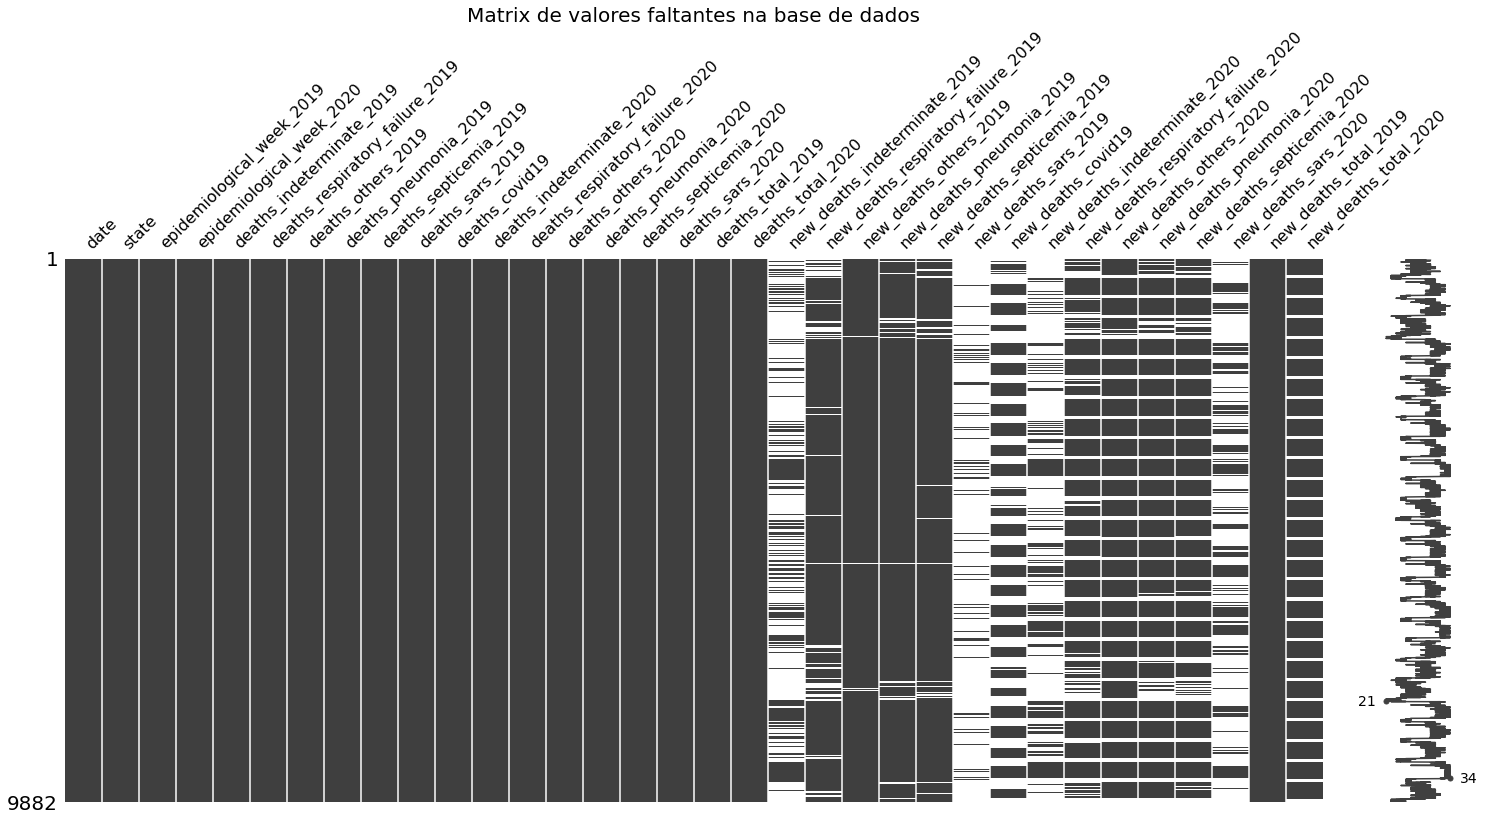

In [ ]:
plt.figure(figsize=(10,10))
msno.matrix(cartoriosObitos)
plt.title('Matrix de valores faltantes na base de dados',fontsize=20)
plt.show()

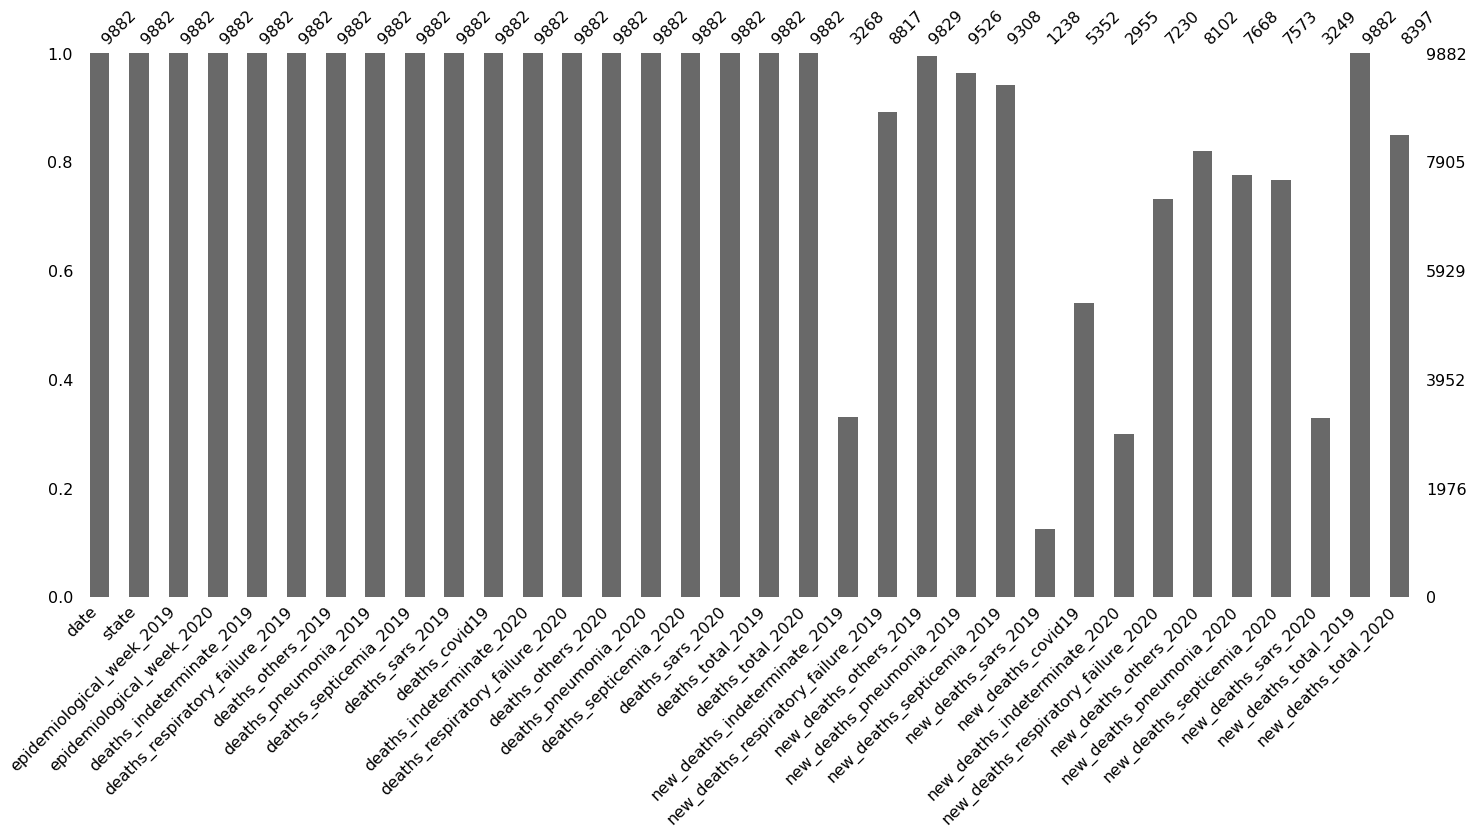

In [ ]:
msno.bar(cartoriosObitos)

**Importante notar que: A partir da variável "new_deaths_indeterminate_2019" a contagem se torna  instável.**

In [ ]:
cartoriosObitos.isnull().sum().sort_values(ascending=False)

new_deaths_sars_2019                   8644
new_deaths_indeterminate_2020          6927
new_deaths_sars_2020                   6633
new_deaths_indeterminate_2019          6614
new_deaths_covid19                     4530
new_deaths_respiratory_failure_2020    2652
new_deaths_septicemia_2020             2309
new_deaths_pneumonia_2020              2214
new_deaths_others_2020                 1780
new_deaths_total_2020                  1485
new_deaths_respiratory_failure_2019    1065
new_deaths_septicemia_2019              574
new_deaths_pneumonia_2019               356
new_deaths_others_2019                   53
deaths_sars_2019                          0
state                                     0
epidemiological_week_2019                 0
epidemiological_week_2020                 0
deaths_indeterminate_2019                 0
deaths_respiratory_failure_2019           0
deaths_others_2019                        0
deaths_pneumonia_2019                     0
deaths_septicemia_2019          

**Investigação de se as variáveis que apresentam missing values**

>> Como se pode observar, os variáveis que apresentam missings na realidade não apresentam valores Zero.
>> Foi realizado um filtro com a listagem das colunas da tabela acima. Caso alguma apresentasse valor 0.0 seria retornado algum resultado. Logo se percebe que os NaN provavelmente lidam com dias que **NÃO HOUVERAM** novas contagens. Desta forma, podemos assumir que as colunas receberam valores diferentes NaN quando houve algum tipo de alteração.

>> Na realidade existe uma coluna ([new_deaths_total_2020] com 252 no total) que apresenta alguns valores zero.


In [ ]:
cartoriosObitos.query('new_deaths_sars_2019==0 |new_deaths_indeterminate_2020==0|\
                      new_deaths_sars_2020==0| new_deaths_sars_2019==0|\
                      new_deaths_indeterminate_2019==0|new_deaths_covid19==0|\
                      new_deaths_respiratory_failure_2020==0|new_deaths_septicemia_2020==0|\
                      new_deaths_pneumonia_2020 ==0|new_deaths_others_2020 ==0|\
                      new_deaths_respiratory_failure_2019==0|\
                      new_deaths_septicemia_2019==0|new_deaths_pneumonia_2019==0|new_deaths_others_2019==0')

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020


In [ ]:
cartoriosObitos.query('new_deaths_total_2020==0 and new_deaths_indeterminate_2019 == new_deaths_indeterminate_2019')

,date,state,epidemiological_week_2019,epidemiological_week_2020,deaths_indeterminate_2019,deaths_respiratory_failure_2019,deaths_others_2019,deaths_pneumonia_2019,deaths_septicemia_2019,deaths_sars_2019,deaths_covid19,deaths_indeterminate_2020,deaths_respiratory_failure_2020,deaths_others_2020,deaths_pneumonia_2020,deaths_septicemia_2020,deaths_sars_2020,deaths_total_2019,deaths_total_2020,new_deaths_indeterminate_2019,new_deaths_respiratory_failure_2019,new_deaths_others_2019,new_deaths_pneumonia_2019,new_deaths_septicemia_2019,new_deaths_sars_2019,new_deaths_covid19,new_deaths_indeterminate_2020,new_deaths_respiratory_failure_2020,new_deaths_others_2020,new_deaths_pneumonia_2020,new_deaths_septicemia_2020,new_deaths_sars_2020,new_deaths_total_2019,new_deaths_total_2020
668,2020-10-29,AL,44,44,77,1309,8254,2175,1771,12,2078,77,1134,8855,1614,1760,275,13598,15793,1.00,3.00,29.00,8.00,3.00,nan,nan,nan,nan,nan,nan,nan,nan,44,0.00
670,2020-10-31,AL,44,44,78,1314,8305,2189,1785,12,2078,77,1134,8855,1614,1760,275,13683,15793,1.00,2.00,33.00,5.00,8.00,nan,nan,nan,nan,nan,nan,nan,nan,49,0.00
1034,2020-10-29,AM,44,44,111,542,6919,1775,1524,30,2303,126,793,7050,2013,1529,717,10901,14531,2.00,2.00,18.00,10.00,6.00,nan,nan,nan,nan,nan,nan,nan,nan,38,0.00
1040,2020-11-04,AM,45,45,112,548,7069,1803,1558,30,2303,126,793,7050,2013,1529,717,11120,14531,1.00,nan,28.00,5.00,5.00,nan,nan,nan,nan,nan,nan,nan,nan,39,0.00
1042,2020-11-06,AM,45,45,113,551,7120,1812,1562,30,2303,126,793,7050,2013,1529,717,11188,14531,1.00,1.00,25.00,5.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,33,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,2020-11-03,SP,45,45,1182,21738,135689,62857,36666,252,42105,1481,22811,135273,45067,32485,2101,258384,281323,5.00,65.00,428.00,177.00,127.00,nan,nan,nan,nan,nan,nan,nan,nan,802,0.00
9458,2020-11-04,SP,45,45,1188,21795,136113,63070,36822,253,42105,1481,22811,135273,45067,32485,2101,259241,281323,6.00,57.00,424.00,213.00,156.00,1.00,nan,nan,nan,nan,nan,nan,nan,857,0.00
9459,2020-11-05,SP,45,45,1194,21860,136589,63305,36942,253,42105,1481,22811,135273,45067,32485,2101,260143,281323,6.00,65.00,476.00,235.00,120.00,nan,nan,nan,nan,nan,nan,nan,nan,902,0.00
9460,2020-11-06,SP,45,45,1197,21921,136983,63508,37042,253,42105,1481,22811,135273,45067,32485,2101,260904,281323,3.00,61.00,394.00,203.00,100.00,nan,nan,nan,nan,nan,nan,nan,nan,761,0.00


**Conclusão pré análise óbitos covid 2019-2020 brasil io.**

>> Dados as incertezas apresentadas na base de dados, acho mais prudente descartar todas as colunas que apresentam *missings* (por padrão, são todas as colunas que contabilizam as mortes diárias (com *new* no nome)). Também como não 

>> Outro aspecto importante é que não achei nada que confirmasse a hipótese dos *missings values* estarem presentes no dia por não haver nenhuma contagem nova.

**Base de dados Kaggle - Registro de óbitos desde 1970**

In [ ]:
obitosKaggle = pd.read_csv('/content/archive.zip',compression ='zip')

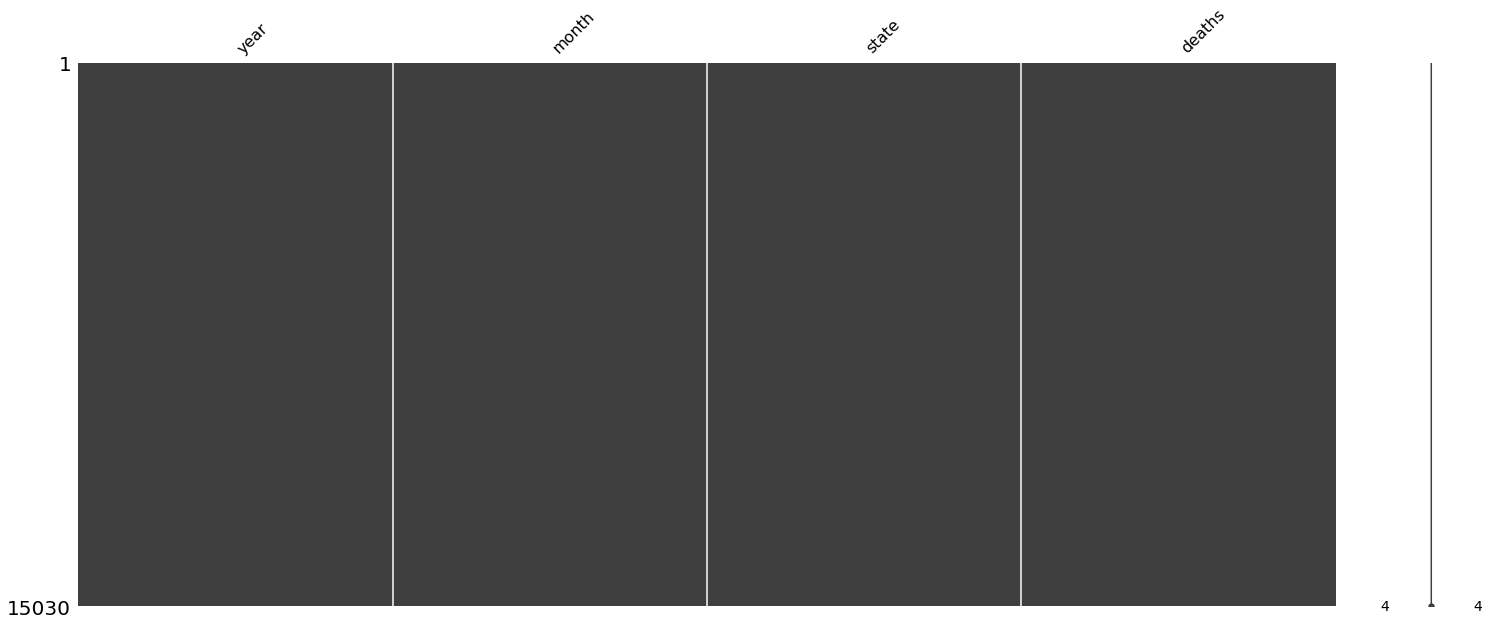

In [ ]:
msno.matrix(obitosKaggle)

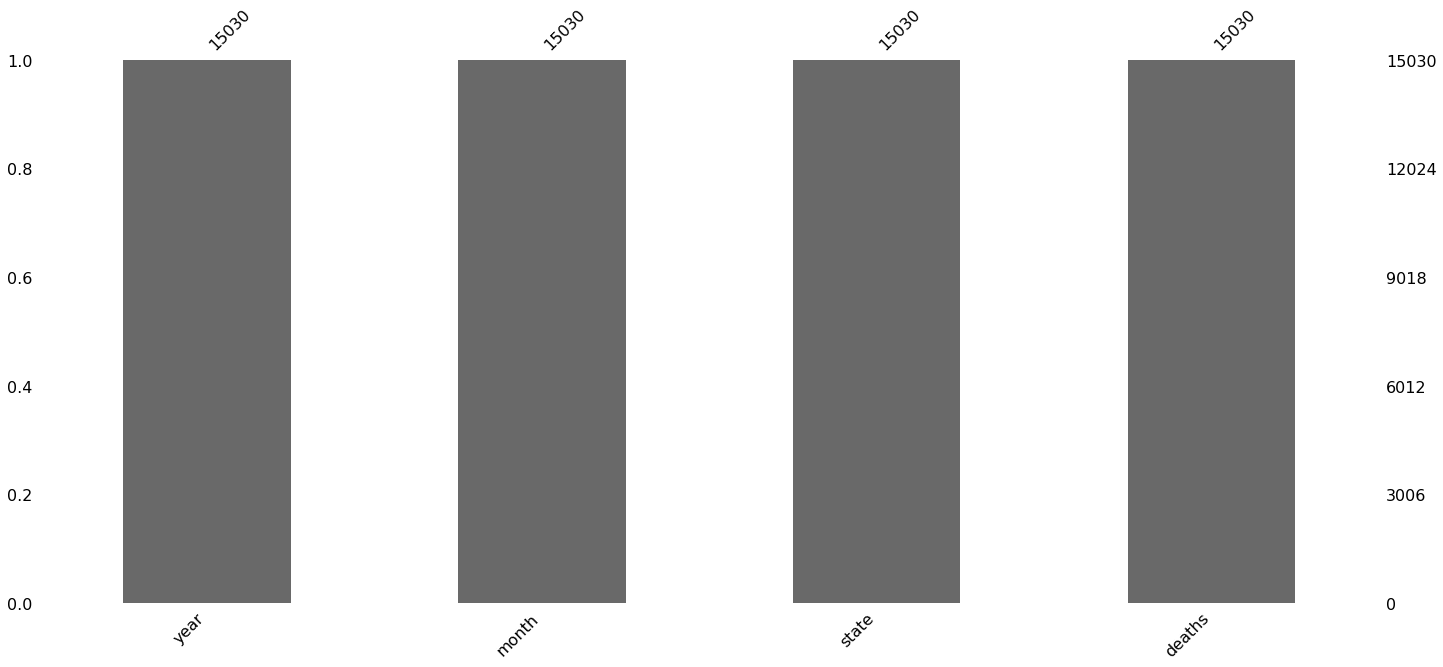

In [ ]:
msno.bar(obitosKaggle)

**Conclusão pré análise base Kaggle**

>> A base de dados não apresenta missings ou, em um primeiro momento de forma visual, anomalias.

# Panorama Geral

Aqui iremos analisar propriamente ditos os dados da pandêmia. Num primeiro momento será mostrado um panorama geral do Brasil, com análise das contagens brutas de casos e de mortes e posteriormente será realizada uma nova análise considerando a taxa de proporção por 100 mil habitantes de infectados. Ao final será investigado o número de mortes registradas em cartório para uma breve comparação com os anos anteriores.

Funções Auxiliares de Plotagem:

In [ ]:
import matplotlib.ticker as ticker

def barplot(data=None,x=None,y=None,color=None,title=None,subplot=None,unitstd=None,*args):  
  r_data = data[y].argsort().argsort()
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(20,10))
  # plt.subplot(*subplot)  
  plt.title(title)
  pal_data = sns.color_palette(color,len(data)) 
  sns.despine(left=True,bottom=True)
  ax = sns.barplot(data=data,x=x,y=y,palette=np.array(pal_data[::-1])[r_data])
  if unitstd:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} '))
  else:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} MM'))

def barplotInTheSame(data=None,x=None,y=None,title=None,palette=None):  
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(20,10))
  dataMelted = data.melt(x,var_name='cols',value_name='vals') 
  plt.title(title)
  # pal_data = sns.color_palette(color,len(data)) 
  sns.despine(left=True,bottom=True)
  ax = sns.barplot(data=dataMelted,x=x,y='vals',hue='cols',palette=palette)
  # if unitstd:
  #   ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} '))
  # else:
  #   ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} MM'))

def lineplotInTheSame(data=None,x=None,title=None,unitstd=None,palette=None):  
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(20,10))
    dataMelted = data.melt(x,var_name='cols',value_name='vals') 
    plt.title(title)
    # pal_data = sns.color_palette(color,len(data)) 
    sns.despine(left=True,bottom=True)
    ax = sns.lineplot(data=dataMelted,x=x,y='vals',hue='cols',palette=palette)
    plt.legend(loc='upper right', bbox_to_anchor=(0.10, 0,1,1))
    if unitstd:
      ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} '))
    else:
      ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} MM'))



,estimated_population
state,
SP,46289333.00
ES,4064052.00
RJ,17366189.00
BA,14930634.00
DF,3055149.00
AL,3351543.00
MG,21292666.00
RS,11422973.00
GO,7113540.00


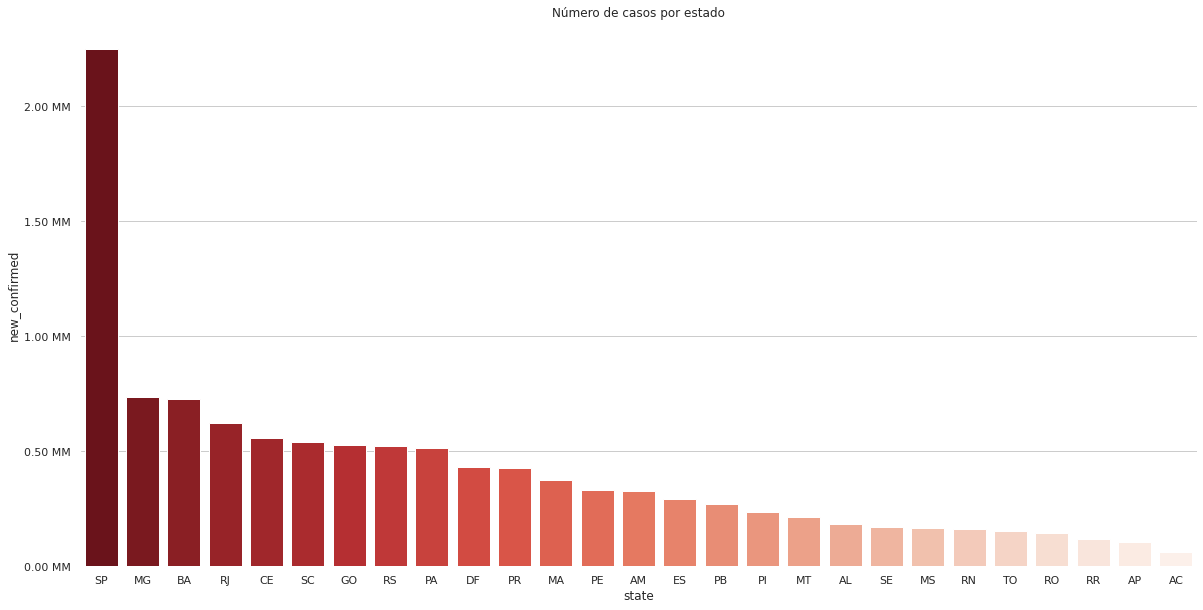

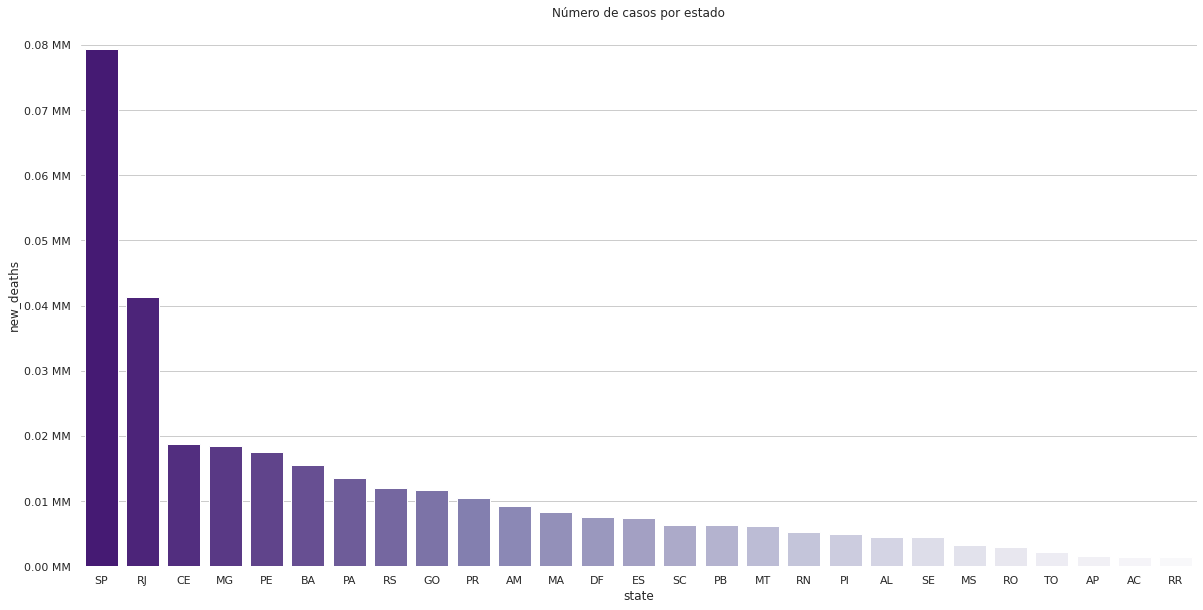

In [ ]:
sumGeneral = covid19.groupby('state')[['state','new_confirmed','new_deaths']].sum()
tretedSumGe=sumGeneral.sort_values('new_confirmed',ascending=False)
tretedSumGeD=sumGeneral.sort_values('new_deaths',ascending=False)


barplot(tretedSumGe/1000000,
        x=tretedSumGe.index,
        y='new_confirmed',
        color='Reds_r',
        title='Número de casos por estado',
        unitstd = False)
      


barplot(tretedSumGeD/1000000,
        x=tretedSumGeD.index,
        y='new_deaths',
        color='Purples_r',
        title='Número de casos por estado',
        unitstd = False)


       ############################################### Calculo por 100Mil Habitantes ######################################################

pop = covid19.query('place_type == "state"')[['state','estimated_population']]
pop = pop.set_index('state')
popStates = pop.drop_duplicates()
popStates

In [ ]:
sumGeneral['pop_general'] = popStates


In [ ]:
perHundreds = pd.DataFrame()
perHundreds['Cases_Per_100k'] = sumGeneral['new_confirmed']/sumGeneral['pop_general']*10e4
perHundreds['Deaths_Per_100k']=sumGeneral['new_deaths']/sumGeneral['pop_general']*10e4
perHundreds

,Cases_Per_100k,Deaths_Per_100k
state,,
AC,7098.62,156.52
AL,5477.06,135.58
AM,7797.77,218.86
AP,12298.25,175.57
BA,4870.07,104.58
CE,6073.43,204.79
DF,14196.43,246.08
ES,7179.88,182.82
GO,7386.53,165.15


## Análise relativa

Quando se trata de dados populacionais, faz mais sentido uma análise relativa. Portanto, foi utilizado a taxa de 100 mil habitantes tanto para casos cofirmados quanto para mortes.

Assim, fica mais fácil de compreender quais estados tiveram uma maior proporção de números de infectados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027377 entries, 0 to 1027376
Data columns (total 19 columns):
 #   Column                                         Non-Null Count    Dtype         
---  ------                                         --------------    -----         
 0   city                                           1020839 non-null  object        
 1   city_ibge_code                                 1023288 non-null  float64       
 2   date                                           1027377 non-null  datetime64[ns]
 3   epidemiological_week                           1027377 non-null  int64         
 4   estimated_population                           1023288 non-null  float64       
 5   estimated_population_2019                      1023288 non-null  float64       
 6   is_last                                        1027377 non-null  bool          
 7   is_repeated                                    1027377 non-null  bool          
 8   last_available_confirmed        

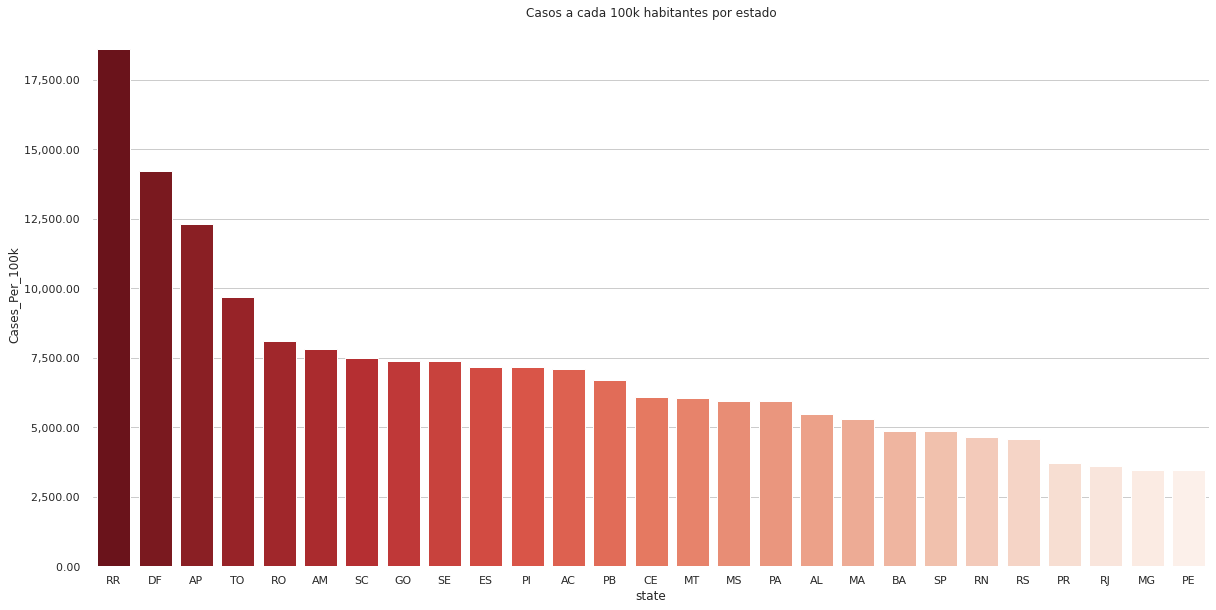

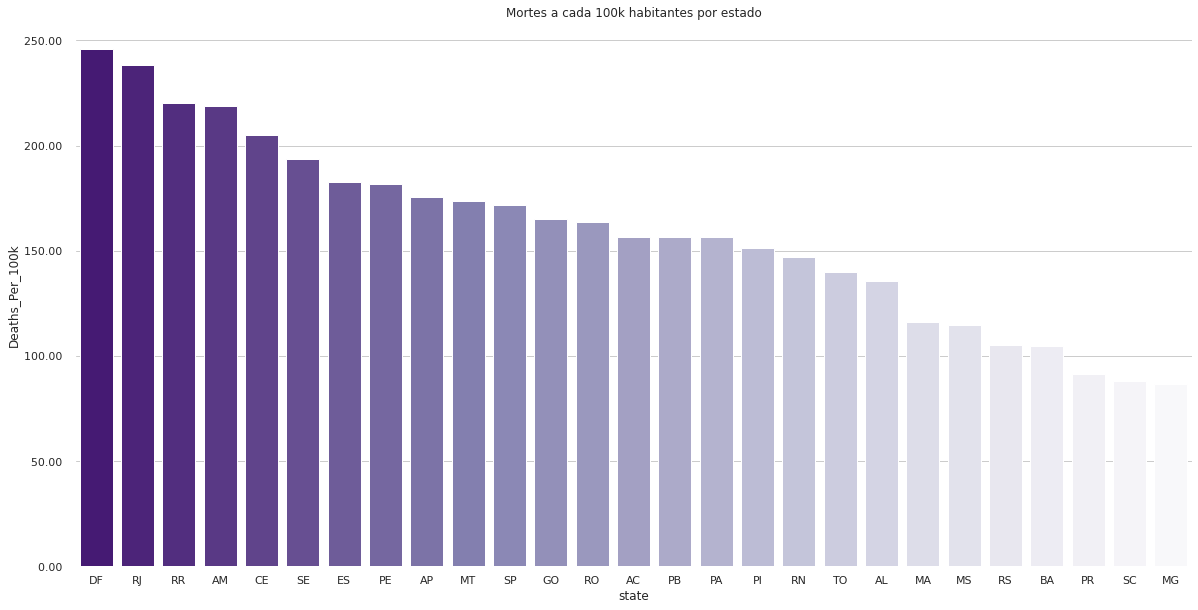

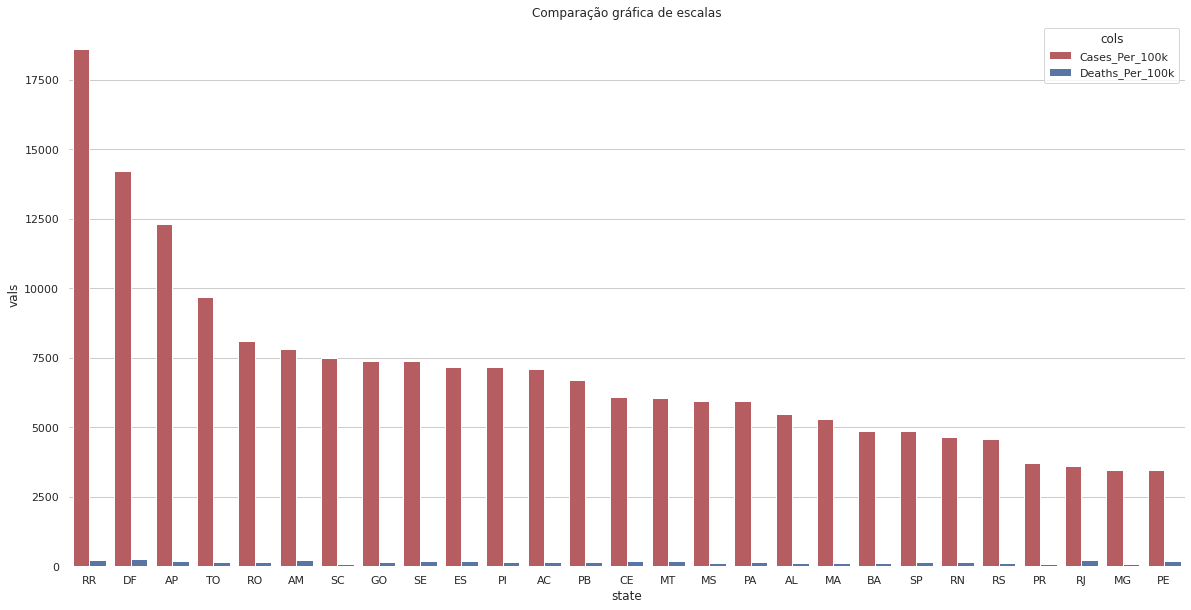

In [161]:
casesPerHundredT=perHundreds.sort_values('Cases_Per_100k',ascending= False)
barplot(casesPerHundredT,
        x=casesPerHundredT.index,
        y='Cases_Per_100k',
        color='Reds_r',
        title='Casos a cada 100k habitantes por estado',
        unitstd = True)

deathsPerHundredT=perHundreds.sort_values('Deaths_Per_100k',ascending= False)
barplot(deathsPerHundredT,
        x=deathsPerHundredT.index,
        y='Deaths_Per_100k',
        color='Purples_r',
        title='Mortes a cada 100k habitantes por estado',
        unitstd = True)

################### Comparação de escalas #######################
covid19['date'] = pd.to_datetime(covid19['date'])
covid19.info()
tezte = deathsPerHundredT.copy()
tezte = tezte.sort_values('Cases_Per_100k',ascending=False)
tezte['state'] = tezte.index
tezteMelted = tezte.melt('state',value_name='vals',var_name='cols')
barplotInTheSame(data=tezte,x='state',title='Comparação gráfica de escalas', palette=["C3", "C0"])

Quando analisamos os números de uma forma relativa observamos que estados com uma população menor apresentam as maiores proporções de infectados a cada 100 mil habitantes. Este é um comportamento esperado pois cada infectado tem um peso diretamente proporcional ao número de hab. do estado. Em outras palavras, cada indivíduo infectado em Rorâima, por exemplo, contribui mais para o aumento da proporção no estado do que um indivíduo em São Paulo. Ainda dentro deste contexto, um estado que chama a atenção é o Distrito Federal. O estado chegou próximo de 500 Mil casos com uma populão aproximada de 3 MM. Uma das maiores taxas de infecção por 100 Mil Habitantes.


>> Caso pudessemos garantir que cada estado fez seu dever de casa e orientou sua população adequadamente com relação a medidas de higiêne e isolamento social e que ainda os testes foram realizados em larga escala os dados poderiam sugerir que a doença apresenta uma taxa de propagação relativamente estável que não depende do número de indivíduos na população. Isto é apenas uma breve inferência dos dados disponíveis e não existe o rigor científico suficiente neste estudo para tirar isto como conclusão. 



>> Um boato que circulava logo no começo da pandemia era que um clima com temperaturas mais elevadas poderia desestabilizar o vírus e diminuir sua eficácia de contaminação. Como podemos observar,para os 5 estados que apresentam a maior taxa de contaminados a cada 100 mil habitantes, não existe um padrão específio que possa ser identificado. Estados com os mais variados climas estão entre os primeiros.



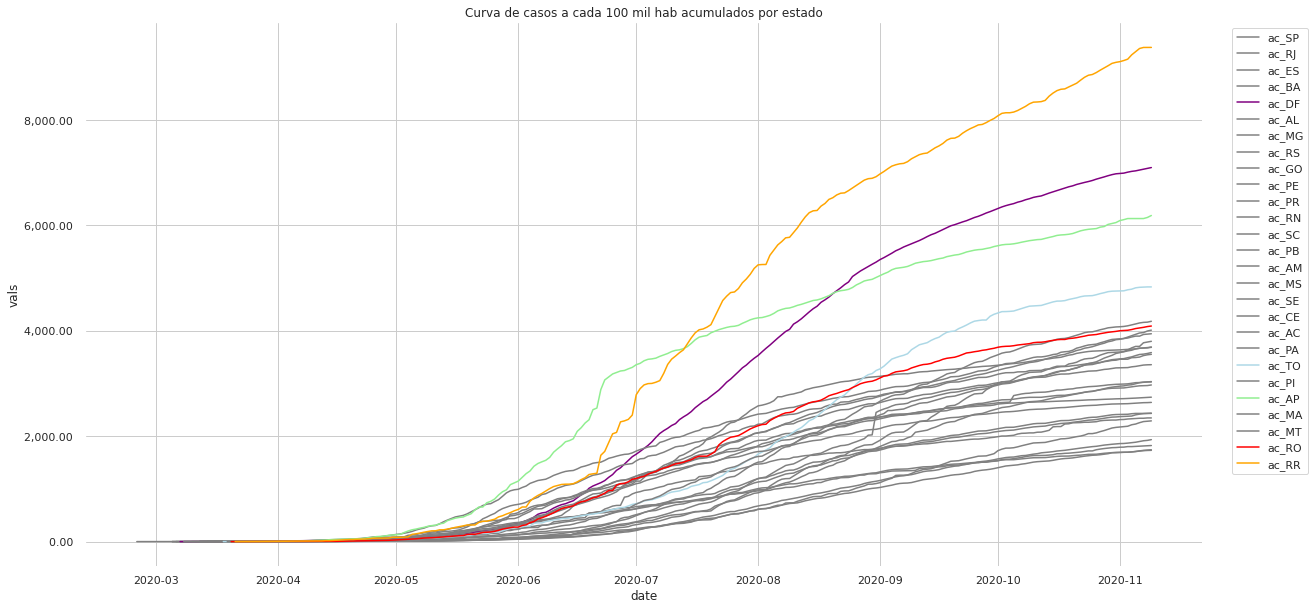

In [163]:
covid19['new_confirmed_normat_pop'] = (covid19['new_confirmed']/covid19['estimated_population'])*10e4


states = covid19['state'].unique().tolist()
teste = pd.DataFrame()

for state in states[0:]:
  string = 'state == "'+state+'" and place_type == "state"'
  state_view = covid19.query(string)[['date','new_confirmed_normat_pop','new_deaths']]
  state_view = state_view.set_index('date')  
  teste['ac_'+state] = state_view['new_confirmed_normat_pop'].cumsum()
  # teste['ac_deaths'+state] = state_view['new_deaths'].cumsum()

teste['date'] = teste.index
lista_estados=teste.columns.tolist()
lista_estados = lista_estados[0:len(lista_estados)-1]
palette_estates = {ele:'grey' for ele in lista_estados}
palette_estates.update({ 'ac_RR': 'orange'})
palette_estates.update({ 'ac_DF': 'purple'})
palette_estates.update({ 'ac_TO': 'lightblue'})
palette_estates.update({ 'ac_AP': 'lightgreen'})
palette_estates.update({ 'ac_RO': 'red'})
lineplotInTheSame(data=teste,x='date',unitstd=True,title="Curva de casos a cada 100 mil hab acumulados por estado",palette=palette_estates)






## Análise de mortes passadas

Nesta seção é estudado a variação de mortes mensais nos últimos 10 anos no País. O objetivo é tentar identificar como a pandemia pode ter impactado nos números em 2020.

No gráfico a baixo, se pode observar as mortes para 2020 (AMARELO) e a média dos últimos 10 anos (VERDE), em cinza são mostradas as mortes para os anos de 2010, 2012, 2014, 2016 e 2018


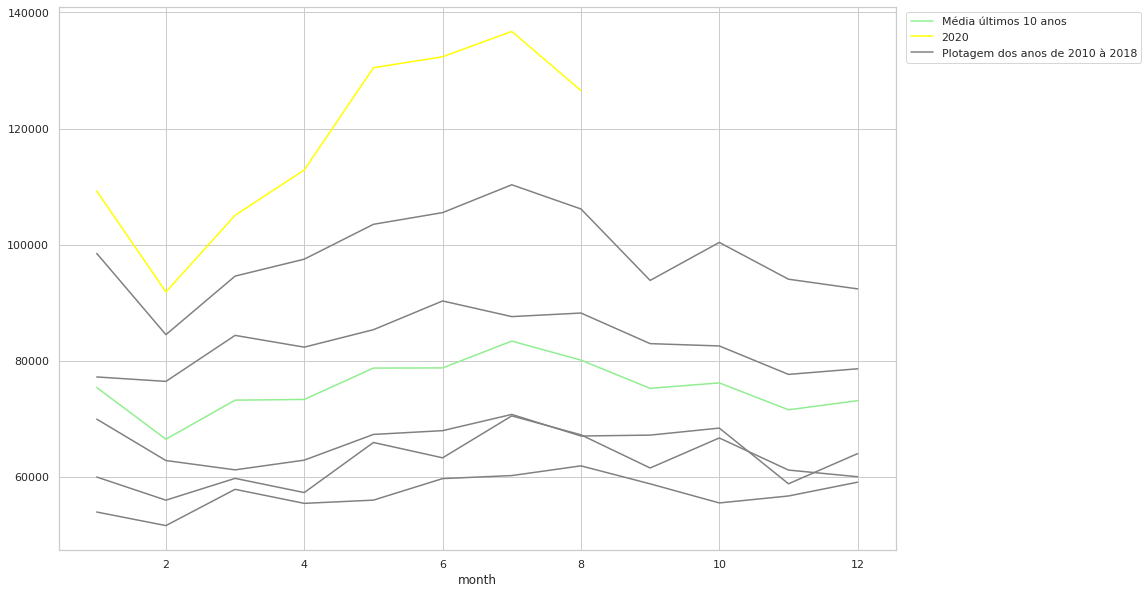

In [183]:
# mortesEstados = pd.crosstab(obitosKaggle['year'],obitosKaggle['state'])
mortesEstados = obitosKaggle.copy()
# mortesEstados.groupby(['year'])['deaths'].sum().plot()
plt.figure(figsize=(15,10))
(mortesEstados.query('year >= 2010 and year <2020').groupby(['month'])['deaths'].sum()/10).plot(color='lightgreen', label = 'Média últimos 10 anos')
ax = mortesEstados.query('year == 2020').groupby(['month'])['deaths'].sum().plot(color='yellow', label = '2020')
mortesEstados.query('year == 2010').groupby(['month'])['deaths'].sum().plot(color='grey', label = 'Plotagem dos anos de 2010 à 2018')
mortesEstados.query('year == 2012').groupby(['month'])['deaths'].sum().plot(color='grey', label = '')
mortesEstados.query('year == 2014').groupby(['month'])['deaths'].sum().plot(color='grey', label = '')
mortesEstados.query('year == 2016').groupby(['month'])['deaths'].sum().plot(color='grey', label = '')
mortesEstados.query('year == 2018').groupby(['month'])['deaths'].sum().plot(color='grey', label = '')
ax.legend(loc='upper right', bbox_to_anchor=(0.30, 0,1,1))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


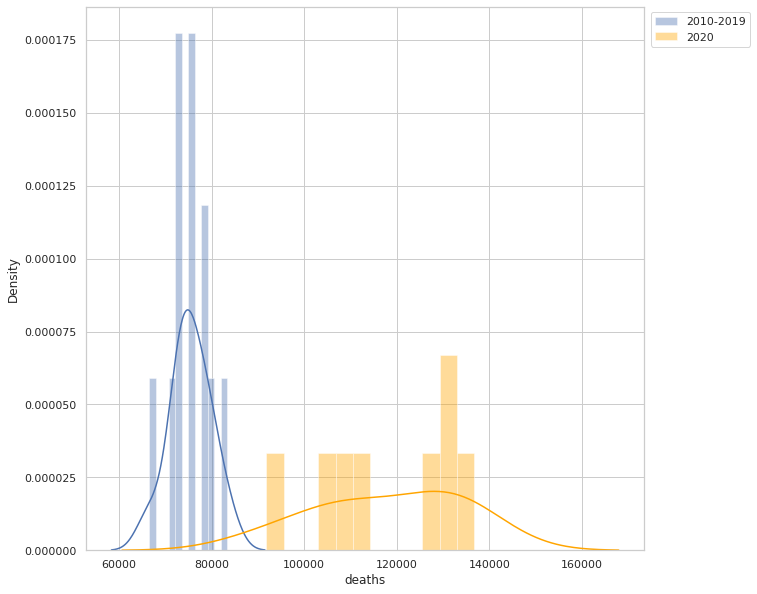

In [179]:
preau = mortesEstados.query('year >= 2010 and year <2020')
aux = preau.groupby(['month'])['deaths'].sum()/len(preau['year'].unique().tolist())
aux2 =mortesEstados.query('year == 2020').groupby(['month'])['deaths'].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.distplot(aux,kde=True,bins=12,label='2010-2019')
sns.distplot(aux2,kde=True,color='orange',bins=12,label='2020')
ax.legend(loc='upper right', bbox_to_anchor=(0.20, 0,1,1))

## Existe alguma diferença ?

Para responder esta pergunta, anstes de mais de prosseguirmos é importante reformula-lá. Uma pergunta mais adequada seria: existe alguma diferença significativa estatística entre os valores observados nos anos anteriores e os observados em 2020?

>> Para realização do teste hipótese irei utilizar teste de hipótese T por **não** se tratar de uma distribuição normal. Será necessário utilizar a lib scipy.

>> **Hipótese Nula H0**: Não existe diferença, os valores observados dentro do ano de 2020 apesar de serem visivemente diferente, nâo têm uma diferença que seja justificada estatísticamente.


>> **Hipótese Alternativa** H1: Sim! O número de mortes observados para o ano de 2020 são atípicos.


In [ ]:
from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_ind

In [165]:
t_stat,p_value = ttest_ind(aux2,aux)
n1,n2 = len(aux2),len(aux)
gl = n1 + n2 - 2 #Graus de Liberdade
alpha = 0.000001 #Grau de confiança 99,999999 %
valor_crit = t.ppf(1.0-alpha,gl)


if abs(t_stat) <= valor_crit:
  print("Aceita-se a hipotese Nula.")
else:
  print('********************************************************************************************************************\n \
          Aceita-se a hipótese Alternativa!!. Portanto o número de mortes no ano de 2020 é sim significativa\n\
********************************************************************************************************************')

********************************************************************************************************************
           Aceita-se a hipótese Alternativa!!. Portanto o número de mortes no ano de 2020 é sim significativa
********************************************************************************************************************


In [ ]:
plt.plot(range(10))


In [ ]:
stateFull = covid19.query('place_type == "state"')[['date','new_confirmed','new_deaths']].groupby('date').sum().cumsum()
stateFull['date'] = stateFull.index
stateFull

,new_confirmed,new_deaths,date
date,,,
2020-02-25,1,0,2020-02-25
2020-02-26,1,0,2020-02-26
2020-02-27,1,0,2020-02-27
2020-02-28,2,0,2020-02-28
2020-02-29,2,0,2020-02-29
...,...,...,...
2020-11-05,5617943,161849,2020-11-05
2020-11-06,5635988,162098,2020-11-06
2020-11-07,5655887,162348,2020-11-07


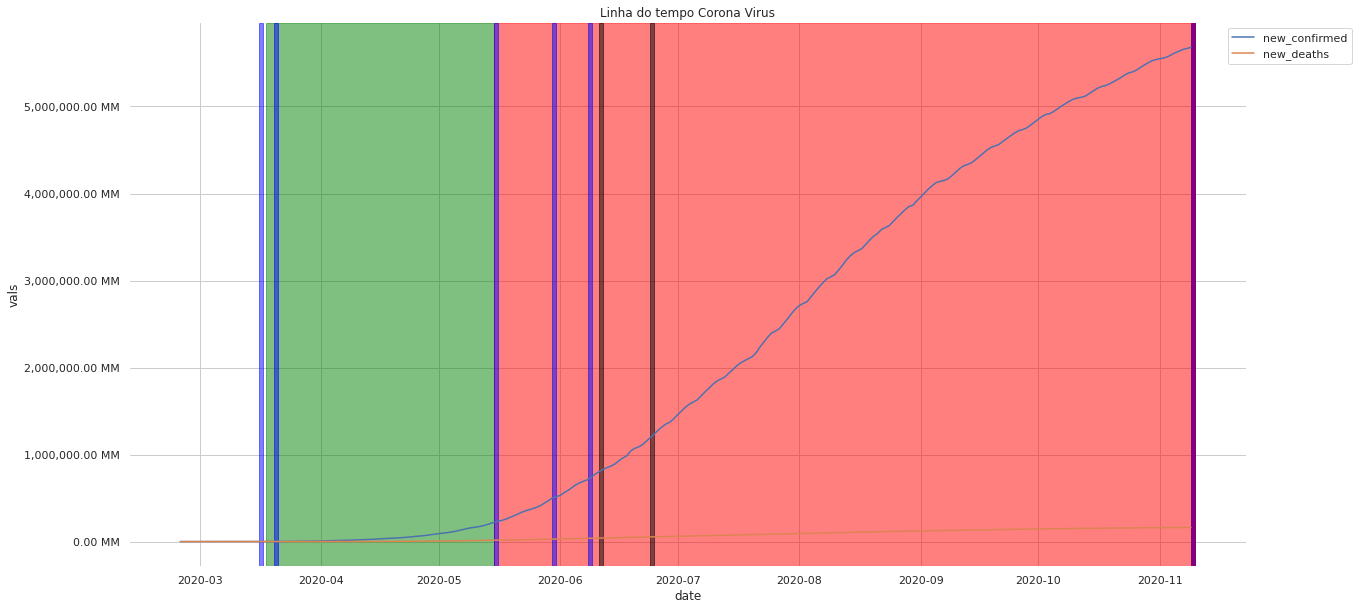

In [160]:
# 21 de março - passa de 1000 casos confirmados
date_str1 = '2020-03-20'
date_str2 = '2020-03-21'
date_dt1 = datetime.strptime(date_str1, '%Y-%m-%d')
date_dt2 = datetime.strptime(date_str2, '%Y-%m-%d')

# 16 de Abril - Ministro Luiz Henrique Mandeta é exonerado do Cargo
date_str3 = '2020-03-16'
date_str4 = '2020-03-17'
date_dt3 = datetime.strptime(date_str3, '%Y-%m-%d')
date_dt4 = datetime.strptime(date_str4, '%Y-%m-%d')

# 15 de Maio - Mandato Nelson Teich
date_str5 = '2020-03-18'
date_str6 = '2020-05-15'
date_dt5 = datetime.strptime(date_str5, '%Y-%m-%d')
date_dt6 = datetime.strptime(date_str6, '%Y-%m-%d')

# 15 de Maio - Mandato Nelson Teich
date_str5 = '2020-03-18'
date_str6 = '2020-05-15'
date_dt5 = datetime.strptime(date_str5, '%Y-%m-%d')
date_dt6 = datetime.strptime(date_str6, '%Y-%m-%d')

# 16 de Maio - São Paulo Passa a China em número de casos
date_str7 = '2020-05-15'
date_str8 = '2020-05-16'
date_dt7 = datetime.strptime(date_str7, '%Y-%m-%d')
date_dt8 = datetime.strptime(date_str8, '%Y-%m-%d')

# 31 de Maio - Brasil supera 500 Mil Casos
date_str9 = '2020-05-30'
date_str10 = '2020-05-31'
date_dt9 = datetime.strptime(date_str9, '%Y-%m-%d')
date_dt10 = datetime.strptime(date_str10, '%Y-%m-%d')

# 25 de Junho - 50 mil mortes causads pelo Sars-Covid-2019
date_str11 = '2020-06-24'
date_str12 = '2020-06-25'
date_dt11 = datetime.strptime(date_str11, '%Y-%m-%d')
date_dt12 = datetime.strptime(date_str12, '%Y-%m-%d')

# 08 de Junho - Governo de Jair Bolsonaro decide restringir acesso de dados sobre a pandemia. Consórcio de veículos de imprensa é formado.
date_str13 = '2020-06-08'
date_str14 = '2020-06-09'
date_dt13 = datetime.strptime(date_str13, '%Y-%m-%d')
date_dt14 = datetime.strptime(date_str14, '%Y-%m-%d')


# 11 de Agosto - Mais de 100 mil mortes causads pelo Sars-Covid-2019
date_str15 = '2020-06-11'
date_str16 = '2020-06-12'
date_dt15 = datetime.strptime(date_str15, '%Y-%m-%d')
date_dt16 = datetime.strptime(date_str16, '%Y-%m-%d')


# 11 de Agosto - Período Sem ministro da saúde
date_str17 = '2020-05-15'
date_str18 = '2020-11-10'
date_dt17 = datetime.strptime(date_str17, '%Y-%m-%d')
date_dt18 = datetime.strptime(date_str18, '%Y-%m-%d')

# 11 de Novembro - Mais de 160 mil mortes. Jair Bolsonaro recomenda que o país dexei de ser de "maricas"
date_str19 = '2020-11-09'
date_str20 = '2020-11-10'
date_dt19 = datetime.strptime(date_str19, '%Y-%m-%d')
date_dt20 = datetime.strptime(date_str20, '%Y-%m-%d')




lineplotInTheSame(data=stateFull,x='date',title='Linha do tempo Corona Virus')
plt.axvspan(date_dt5, date_dt6, color='green', alpha=0.5)
plt.axvspan(date_dt17, date_dt18, color='red', alpha=0.5)
plt.axvspan(date_dt1, date_dt2, color='blue', alpha=0.5)
plt.axvspan(date_dt3, date_dt4, color='blue', alpha=0.5)
plt.axvspan(date_dt7, date_dt8, color='blue', alpha=0.5)
plt.axvspan(date_dt9, date_dt10, color='blue', alpha=0.5)
plt.axvspan(date_dt11, date_dt12, color='black', alpha=0.5)
plt.axvspan(date_dt13, date_dt14, color='blue', alpha=0.5)
plt.axvspan(date_dt15, date_dt16, color='black', alpha=0.5)
plt.axvspan(date_dt19, date_dt20, color='purple', alpha=1)


plt.show()

**Timeline Corona Virus**

>>21 de março - passa de 1000 casos confirmados


>>16 de Abril - Ministro Luiz Henrique Mandeta é exonerado do Cargo

>>15 de Maio - 10 Agosto - Mandato Nelson Teich


>>16 de Maio - São Paulo Passa a China em número de casos


>>31 de Maio - Brasil supera 500 Mil Casos


>>25 de Junho - 50 mil mortes causads pelo Sars-Covid-2019

>>08 de Junho - Governo de Jair Bolsonaro decide restringir acesso de dados sobre a pandemia. Consórcio de veículos de imprensa é formado.


>>11 de Agosto - Mais de 100 mil mortes causads pelo Sars-Covid-2019


>>11 de Agosto - **até hoje** > Período Sem ministro da saúde


>>11 de Novembro - Mais de **160 mil mortes**. Jair Bolsonaro recomenda que o país dexei de ser de "maricas"



# Conclusão:

>> Como era de se esperar, de fato o Sars-Covid-19 impactou diretamente o sistema de saúde nacional e isto pode ser visto pelo elevado número de mortes que ultrapassa com folga a média de mortes mensais dos últimos 11 anos.

>> Alguns estados não tão populosos sofreram igualmente com a contaminação da doença com destaque para RR, DF, AP, TO e RO. 

>> Os dados sugerem que não existe um padrão que justifique maior espalhamento em climas mais quentes ou frios.

>>

